In [132]:
import numpy as np
fruits = np.load("../Data/fruits.npy")
fruits.shape

(300, 100, 100)

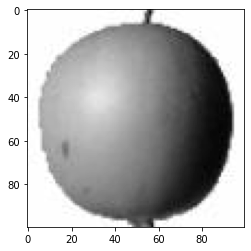

In [133]:
# image 확인하기
import matplotlib.pyplot as plt

plt.imshow(fruits[0].reshape(100,100),cmap='gray_r')
plt.show()

In [134]:
# Target 만들기
target = np.concatenate([np.zeros(100),np.ones(100),np.full(100,2)])
target.shape

(300,)

In [135]:
target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

### train과 test로 분류하기

In [136]:
train = fruits.reshape(-1,100,100,1) / 255.0

In [137]:
from sklearn.model_selection import train_test_split

train_Data,test_data,train_target,test_target = train_test_split(
    train, target,test_size=0.2,random_state=42
)

trainData, valData, trainTarget, valTarget = train_test_split(
    train_Data,train_target,test_size=0.2,random_state=42
)

In [138]:
print(trainData.shape)
print(valData.shape)
print(trainTarget.shape)
print(valTarget.shape)

(192, 100, 100, 1)
(48, 100, 100, 1)
(192,)
(48,)


---
# CNN 만들기

In [139]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '3'

In [140]:
from tensorflow import keras

model = keras.Sequential()

In [141]:
model.add(
    keras.layers.Conv2D(
        32,
        kernel_size = 3,
        activation = 'relu',
        padding = 'same',
        input_shape = (100,100,1)
    )
)

In [142]:
model.add(
    keras.layers.MaxPooling2D(2)
)

In [143]:
model.add(
    keras.layers.Conv2D(
        64,
        kernel_size = 3,
        activation = 'relu',
        padding = 'same'
    )
)

In [144]:
model.add(keras.layers.MaxPooling2D(2))

In [145]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [146]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 100, 100, 32)      320       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 40000)             0         
                                                                 
 dense_12 (Dense)            (None, 100)              

In [147]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', 
    metrics = 'accuracy'
)
checkpoint_cb = keras.callbacks.ModelCheckpoint('../Data/best_cnn_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(
    trainData , 
    trainTarget ,
    epochs = 20 ,
    validation_data = (valData , valTarget) ,
    callbacks = [checkpoint_cb , early_stopping_cb]
)

Epoch 1/20
6/6 [==============================] - 2s 334ms/step - loss: 1.3391 - accuracy: 0.4792 - val_loss: 0.3333 - val_accuracy: 0.9583
Epoch 2/20
6/6 [==============================] - 2s 272ms/step - loss: 0.4195 - accuracy: 0.8333 - val_loss: 0.0891 - val_accuracy: 1.0000
Epoch 3/20
6/6 [==============================] - 2s 275ms/step - loss: 0.1243 - accuracy: 0.9583 - val_loss: 0.0160 - val_accuracy: 1.0000
Epoch 4/20
6/6 [==============================] - 2s 307ms/step - loss: 0.0563 - accuracy: 0.9792 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 5/20
6/6 [==============================] - 2s 306ms/step - loss: 0.0210 - accuracy: 0.9896 - val_loss: 5.4871e-04 - val_accuracy: 1.0000
Epoch 6/20
6/6 [==============================] - 2s 306ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 1.9442e-04 - val_accuracy: 1.0000
Epoch 7/20
6/6 [==============================] - 2s 289ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 7.7185e-05 - val_accuracy: 1.0000
Epoch 8/

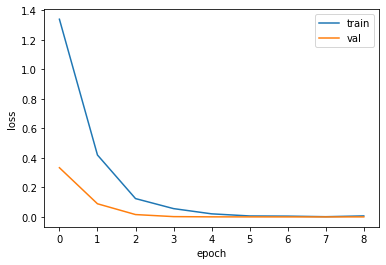

In [148]:
# 시각화 해보기
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [149]:
model.evaluate(valData,valTarget)

2/2 [==============================] - 0s 34ms/step - loss: 7.7185e-05 - accuracy: 1.0000


[7.71847553551197e-05, 1.0]

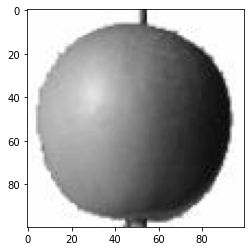

In [150]:
plt.imshow(valData[0].reshape(100,100),cmap='gray_r')
plt.show()

In [151]:
pred = model.predict(valData[0:1])
print(pred)

1/1 [==============================] - 0s 74ms/step
[[9.9952137e-01 4.7175537e-04 3.4445436e-06 9.5042607e-10 8.7594716e-11
  7.5692848e-09 2.1010940e-06 9.1242025e-10 1.2228942e-06 1.4480345e-07]]


In [152]:
# 계단함수
import numpy as np

classes = ['Apple','Pineapple','Banana']

In [153]:
print(classes[np.argmax(pred)])

Apple


### 시험 데이터 확인해보기

In [154]:
test_data_scaled = test_data.reshape(-1,100,100,1) 

In [155]:
model.evaluate(test_data_scaled,test_target)

2/2 [==============================] - 0s 41ms/step - loss: 0.0011 - accuracy: 1.0000


[0.0011257159058004618, 1.0]